# Dictionaries and Sets

**CS1302 Introduction to Computer Programming**
___

In [1]:
%reload_ext mytutor

## Motivation for associative container

The following code simulates the outcomes from rolling a dice multiple times.

In [2]:
import random

dice_rolls = [random.randint(1,6) for i in range(10)]
print(*dice_rolls)

5 2 6 1 5 1 3 4 3 6


**What is the distribution, i.e., fractional counts?**

(0.0, 1.0)

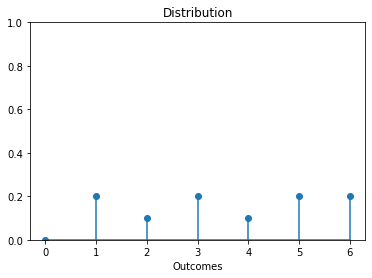

In [3]:
distribution = [dice_rolls.count(i) / len(dice_rolls) for i in range(7)]

import matplotlib.pyplot as plt
plt.stem(range(7), distribution, use_line_collection=True)
plt.xlabel('Outcomes')
plt.title('Distribution')
plt.ylim(0, 1)

In the above code, `distribution[i]` stores the fractional count of outcome `i`.

However, `distribution[0]` is `0` because a dice does not have outcome `0`. Can we avoid such redundancy?

(0.0, 1.0)

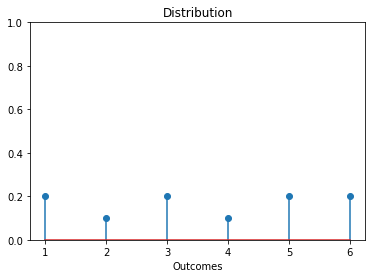

In [4]:
distinct_outcomes = [
    outcome for outcome in range(1, 7) if dice_rolls.count(outcome) > 0
]
distribution = [
    dice_rolls.count(distinct_outcomes[i]) / len(dice_rolls)
    for i in range(len(distinct_outcomes))
]

import matplotlib.pyplot as plt
plt.stem(distinct_outcomes, distribution, use_line_collection=True)
plt.xlabel('Outcomes')
plt.title('Distribution')
plt.ylim(0, 1)

In the above code, 
- `distinct_outcomes` stores the list of distinct outcomes, and
- `distribution[distinct_outcomes[i]]` stores the fractional count of the `i`-th distinct outcome.

What about finding the distribution of characters in an article?  
There are 1,112,064 unicode characters. 
- How obtain the distribution efficiently without creating an entry for each unicode character?
- How to compute the set of distinct characters efficiently without iterating over the set of all unicode characters?
- Can we index `distribution` directly by the set of distinct characters?

What we need is a composite data type that
- can keep a set of *unique keys of different types* (such as the characters in our example), and
- associate to different keys possibly different *values of any types* such as (the fractional counts of the characters).

Such data structure is called an [associative container](https://en.wikipedia.org/wiki/Associative_containers).

**How to use associative containers in Python?**

There are two built-in classes for associative containers:
- `set` can store a set of unique keys of possibly different types.
- `dict`ionary can store a set of key-value pairs.

We have already used sets and dictionaries before.

In [5]:
%%mytutor -h 400
a = (lambda **kwargs: kwargs)(start=0, stop=5, step=1)
b = set([1,1,2,3,3,3])
assert len(a) == len(b)

Both `set` and `dict` 
- implement `len` method that returns the number of keys, and
- are mutable, so we can mutate their keys and values.  

## Constructing associative containers

**How to create set/dictionary?**

Similar to tuple/list, we can use enclosure, constructors, and comprehension.

**How to create a set/dict by enumerating its keys/values?**

For `dict`, enclose a comma-separated sequence of `key : value` pairs by braces `{` and `}`.

In [6]:
%%mytutor -h 350
empty_dictionary = {}
a = {'a': 0, 'b': 1}
b = {**a, 'c': 0, 'd': 1}

For `set`, omit `: value`.

In [7]:
%%mytutor -h 300
a = {(1, 2.0), print, *range(2), *'23'}
empty_set = {*()}  # Why not use {}?

We can also create a set/dictionary from other objects using their constructors `set`/`dict`.

In [8]:
%%mytutor -h 550
empty_set = set()
string2set = set('abc')
range2set = set(range(2))
list2set = set(['abc',range(2)])
set2set = set(list2set)

In [9]:
%%mytutor -h 650
empty_dict = dict()
enumerate2dict = dict(enumerate('abc'))
zip2dict = dict(zip('abc','123'))
kwargs2dict = dict(one=1,two=2)
dict2dict = dict(kwargs2dict)

**Exercise** `dict` also has a [*class method* `fromkeys`](https://docs.python.org/3/library/stdtypes.html#dict.fromkeys) to construct a dictionary with keys from iterable pointing to a default value. Create a dictionary using `fromkeys` with keys being the non-negative integers smaller than `100` and values being `0`. 

*Hint:* Use `dict.fromkeys` since a class method is bound to the class rather than an object of the class.

In [10]:
dict.fromkeys?
### BEGIN SOLUTION
fromkeys_dict = dict.fromkeys(range(100),0)
### END SOLUTION

# test
assert all(fromkeys_dict[k] == 0 for k in fromkeys_dict)

**How to use a rule to construct a set/dictionary?**

The following function uses a one-line dictionary comprehension to return the distribution of items in a sequence:

In [11]:
def distribute(seq):
    return {k : seq.count(k)/len(seq) for k in set(seq)}

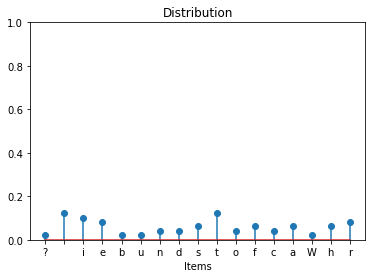

In [12]:
import matplotlib.pyplot as plt

def plot_distribution(seq):
    dist = distribute(seq)
    plt.stem(dist.keys(),   # set-like view of the keys
             dist.values(), # view of the values
             use_line_collection=True)
    plt.xlabel('Items')
    plt.title('Distribution')
    plt.ylim(0, 1)
    
plot_distribution('What is the distribution of different characters?')

- The object methods `keys` and `values` provide a dynamic [view](https://docs.python.org/3/glossary.html#term-dictionary-view) of the keys.  
- Unlike a copy, subsequent changes to the dictionary are also reflected in a previously returned view.
- `items` provides a set-like view of the key-value pairs.

In [13]:
%%mytutor -h 500
a = dict(enumerate('abc'))
views = a.keys(), a.values(), a.items()
a.pop(1)    # remove the key 1 and its associated value
a.popitem() # remove and return a key-value pair
a.clear()   # clear the dictionary

`set` has `pop` and `clear` but not `popitem`. However, `set.pop` behaves like `dict.popitem` instead of `dict.pop`. (Why?)

In [14]:
%%mytutor -h 250
a = set('abc')
a.pop()     # remove and return an element
a.clear()   # clear the set

**Exercise** Use one-line comprehension to return a set of composite numbers smaller than `stop`.  

*Hint:* You do not need to worry about duplicate elements for `set`.

In [15]:
def composite_set(stop):
    ### BEGIN SOLUTION
    return {x for factor in range(2,stop) for x in range(factor*2,stop,factor)}
    ### END SOLUTION
    
print(*sorted(composite_set(100)))

4 6 8 9 10 12 14 15 16 18 20 21 22 24 25 26 27 28 30 32 33 34 35 36 38 39 40 42 44 45 46 48 49 50 51 52 54 55 56 57 58 60 62 63 64 65 66 68 69 70 72 74 75 76 77 78 80 81 82 84 85 86 87 88 90 91 92 93 94 95 96 98 99


## Hashability

For `set` and `dict`, 
- identical keys are merged to the same entry even though
- values associated with different keys can be the same.

In [16]:
%%mytutor -h 350
a = {0: 'a', 0.0: 'b', 2: 'b'}
b = {0j, 0, 0.0, '', False}
assert 0 == 0.0 == 0j == False != ''

This is implemented efficiently by [*hashing*](https://docs.python.org/3/glossary.html#term-hashable). A key must be a hashable object which:

- has a hash value (returned by `__hash__` method) that never changes during its lifetime, and
- can be compared (using `__eq__` method) to other objects.  
  *Hashable objects which compare equal must have the same hash value.*

In [17]:
import collections

for i in 0, 0.0, 0j, '', False, (), [], {}, set(), frozenset():
    if isinstance(i, collections.abc.Hashable):
        print('{} is hashable. E.g., hash({!r}) == {}'.format(type(i),i,hash(i)))
    else:
        print('{} is NOT hashable.'.format(type(i)))

<class 'int'> is hashable. E.g., hash(0) == 0
<class 'float'> is hashable. E.g., hash(0.0) == 0
<class 'complex'> is hashable. E.g., hash(0j) == 0
<class 'str'> is hashable. E.g., hash('') == 0
<class 'bool'> is hashable. E.g., hash(False) == 0
<class 'tuple'> is hashable. E.g., hash(()) == 3527539
<class 'list'> is NOT hashable.
<class 'dict'> is NOT hashable.
<class 'set'> is NOT hashable.
<class 'frozenset'> is hashable. E.g., hash(frozenset()) == 133146708735736


**Why the key should be hashable?**  
**What is the use of a hash value?**

Associative containers are implemented as *hash tables* for efficient lookup of key values.

In [18]:
%%html
<iframe width="912" height="513" src="https://www.youtube.com/embed/LPzN8jgbnvA" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Most mutable objects are not hashable. Why?  
  Mutating a key makes it a different key, which is [hard to track](https://hynek.me/articles/hashes-and-equality/).

`set` has an immutable counterpart called `frozenset`, but `dict` does not have any immutable counterpart. Why?  
While elements of a set must be hashable and therefore mostly immutable, dictionary values may be of mutable types.

Python also uses dictionary for its global/local frames.  
Indeed, [hash collisions can slow down the lookup process](https://stackoverflow.com/questions/8271139/why-is-early-return-slower-than-else).

**Exercise** Why equal objects must have the same hash but different objects may have the same hash? An example is given below:

In [19]:
assert hash(0) == hash(0.0) == hash(0j) == hash(False) == hash('') and False != ''

1. To avoid duplicate keys occupying different entries in a hash table.
2. Hash collision can be detected by `==` and handled by [collision resolution](https://en.wikipedia.org/wiki/Hash_table#Collision_resolution) techniques. To keep the hash table small, hash collision is unavoidable.

## Accessing keys/values

**How to traverse a set/dictionary?**

Set and dictionaries are iterable.  
The for loop iterates over the keys.

In [20]:
a = set('abcde')
b = dict(enumerate('abcde'))
print(*(element for element in a))
print(*((key,b[key]) for key in b))
a[0]  # TypeError

e b d c a
(0, 'a') (1, 'b') (2, 'c') (3, 'd') (4, 'e')


TypeError: 'set' object is not subscriptable

- For the dictionary `b`, we used subscription `b[key]` to access the value associated with `key`.
- Unlike dictionary, set does not implement [`__getitem__`](https://docs.python.org/3/reference/datamodel.html#object.__getitem__) and is therefore not subscriptable.

Unlike tuple/list, `b[-1]` does not refer to the value of the last entry. (Dictionary is not ordered.)

In [21]:
b[-1]  # KeyError

KeyError: -1

The above raises a key error because `-1` is not a key in the dictionary `b`.

Dictionary implements the [`__setitem__`](https://docs.python.org/3/reference/simple_stmts.html#assignment-statements) method so we can enter a key value pair to a dictionary using the assignment operator.

In [22]:
b[-1] = 'f'
b[-1]

'f'

To delete a key, we can use the function `del`.

In [23]:
del b[-1]
b[-1]

KeyError: -1

To avoid key error, we can check if a key is in a dictionary efficiently (due to hashing) using the `in` operator.  
The following is a different implementation of `distribute`.

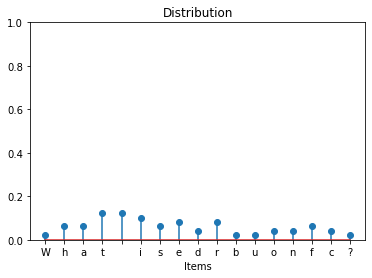

In [24]:
def distribute(seq):
    dist = {}
    for i in seq: 
        dist[i] = (dist[i] if i in dist else 0) + 1/len(seq)
    return dist

plot_distribution('What is the distribution of different characters?')

**Exercise** Unlike the previous implementation using one-line dictionary comprehension, the above alternative implementation uses multiple lines of code to build the dictionary incrementally starting from an empty dictionary.
```Python
def distribute(seq):
    return {k : seq.count(k)/len(seq) for k in set(seq)}
```
Explain whether the alternative is more efficient.

It is more efficient because 
- the alternative implementation traverses `seq` once with near constant time lookup of the key, but
- the list comprehension can traverse `seq` a multiple times linear in `len(seq)`, since every call to `seq.count` has to traverse `seq` once.

Shorter code needs not be more efficient.

**Exercise** `dict` also has a getter method `get` that conveniently returns a default value if the key does not exist. Rewrite the alternative implementation of `distribute` to use `get` instead of `in`.

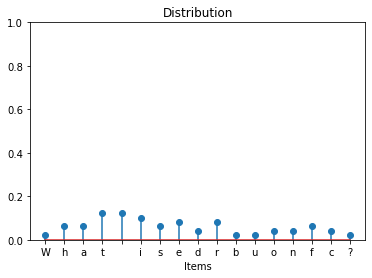

In [25]:
dict.get?
def distribute(seq):
    dist = {}
    for i in seq: 
        ### BEGIN SOLUTION
        dist[i] = dist.get(i,0) + 1/len(seq)
        ### END SOLUTION
    return dist

plot_distribution('What is the distribution of different characters?')

**How to traverse in ascending order of the keys?**

We can apply the function `sorted` to a set/dictionary to return a sorted list of the keys.

In [26]:
%%mytutor -h 600
a = set(reversed('abcde'))
b = dict(reversed([*enumerate('abcde')]))
sorted_elements = sorted(a)
sorted_keys = sorted(b)

**Exercise** Re-implement `plot_distribution` to plot the distribution in ascending order of the keys.

In [27]:
def plot_distribution(seq):
    dist = distribute(seq)
    # pyplot.stem(dist.keys(), dist.values(), use_line_collection=True)
    ### BEGIN SOLUTION
    dist_list = sorted(dist.items(), key = lambda p: p[0])
    pyplot.stem([p[0] for p in dist_list], [p[1] for p in dist_list], use_line_collection=True)
    ### END SOLUTION
    pyplot.xlabel('Items')
    pyplot.title('Distribution')
    pyplot.ylim(0, 1)
    
plot_distribution('What is the distribution of different characters?')

NameError: name 'pyplot' is not defined

**How to add an element to a set and remove an element from it?**

Instead of subscription, `set` has the `add`/`discard`/`remove` methods for adding/removing elements.

In [28]:
%%mytutor -h 400
a = set('abc')
a.add('d')      
a.discard('a')  
a.remove('b')
a.clear()
a.discard('a')  # no error
a.remove('b')   # KeyError

## Other operators and methods

Unlike `str`/`tuple`/`list`, `set` and `dict` do not implement addition `+` and multiplication `*`:

In [29]:
any(hasattr(container, attr) for attr in ('__add__', '__mult__')
    for container in (dict, set, frozenset))

False

**Exercise** Use the unpacking operators `*` and `**` to concatenate two sets/dictionaries below into a new set/dictionary.

In [30]:
set1 = set('abc')
set2 = set('cde')
### BEGIN SOLUTION
concatenated_set = {*set1,*set2}
### END SOLUTION
concatenated_set

{'a', 'b', 'c', 'd', 'e'}

In [31]:
dict1 = dict(enumerate('abc'))
dict2 = dict(enumerate('def',start=2))
### BEGIN SOLUTION
concatenated_dict = {**dict1,**dict2}
### END SOLUTION
concatenated_dict

{0: 'a', 1: 'b', 2: 'd', 3: 'e', 4: 'f'}

`set` overloads many other operators:

In [32]:
%%mytutor -h 550
a, b = {1,2}, {2,3}

union = a | b
assert all(i in union for i in a) and all(i in union for i in b)

intersection = a & b
assert all(i in a and i in b for i in intersection)

assert intersection <= a <= union  # subset
assert union > b > intersection    # proper superset
assert len(a) + len(b) == len(intersection) + len(union) 

symmetric_difference = a ^ b
assert all((i in a or i in b) and not (i in a and i in b) 
           for i in symmetric_difference)
assert symmetric_difference == union - intersection
assert set.isdisjoint(intersection, symmetric_difference)
assert len(union) == len(intersection) + len(symmetric_difference)

The following uses `&` and `-` to compare the sets of public attributes for `set` and `dict`:

In [33]:
set_attributes = {attr for attr in dir(set) if attr[0] != '_'}
dict_attributes = {attr for attr in dir(dict) if attr[0] != '_'}
print('Common attributes:',', '.join(set_attributes & dict_attributes))
print('dict-specific attributes:',', '.join(dict_attributes - set_attributes))
print('set-specific attributes:',', '.join(set_attributes - dict_attributes))

Common attributes: update, clear, copy, pop
dict-specific attributes: keys, get, setdefault, values, fromkeys, popitem, items
set-specific attributes: symmetric_difference_update, difference, isdisjoint, add, difference_update, intersection, issubset, union, remove, intersection_update, issuperset, symmetric_difference, discard


For `set`, the intersection operation `&` can also be performed by
- the class method `intersection` which returns the intersection of its arguments, and
- the object method `intersection_update` which mutates a set object by intersecting the set with the arguments.

In [34]:
%%mytutor -h 300
a = {0,1,2}
b = {1,2,3}
c = set.intersection(a,b,{2,3,4})
a.intersection_update(b,c)

- All other set-specific methods have an associated operator except `isdisjoint` as shown below.
- The object method for `union` is `update` not `union_update`.

|     class method       |          object method        | operator     |
| ---------------------- | ----------------------------- | ------------ |
| `union`                | `update`                      | `\| `        |
| `intersection`         | `intersection_update`         | `&`          |
| `symmetric_difference` | `symmetric_difference_update` | `^`          |
| `issubset`             |                               | `<=`         |
| `issuperset`           |                               | `>=`         |
| `isdisjoint`           |                               |              |

`dict` also has an `update` method that can update a dictionary using dictionary, iterables and keyword arguments:

In [35]:
%%mytutor -h 300
a = {}
a.update(enumerate('a'),b=2)
b = a.copy()
a.update(b,c=3)

**Exercise** For `dict`, there is also a method called [`setdefault`](https://stackoverflow.com/questions/3483520/use-cases-for-the-setdefault-dict-method). Use it to define a function `group_by_type` that 
- takes a sequence `seq` of objects and 
- returns a dictionary `d` such that `d[repr(t)]` returns the list of objects in `seq` of type `t`

If there is no objects of type `t`, raise a key error.

In [36]:
def group_by_type(seq):
    group = {}
    for i in seq:
        ### BEGIN SOLUTION
        group.setdefault(repr(type(i)),[]).append(i)
        ### END SOLUTION
    return group

group_by_type([*range(3),
               *'abc',
               *[i/2 for i in range(3)],
               *[(i,) for i in range(3)],
               *[[i] for i in range(3)],
               *[{i} for i in range(3)],
               *[{i:i} for i in range(3)],
               print,hash,
               int,str,float,set,dict,
               (i for i in range(10)), 
               enumerate('abc'), 
               range(3),
               zip(),
               set.add,
               dict.copy])

{"<class 'int'>": [0, 1, 2],
 "<class 'str'>": ['a', 'b', 'c'],
 "<class 'float'>": [0.0, 0.5, 1.0],
 "<class 'tuple'>": [(0,), (1,), (2,)],
 "<class 'list'>": [[0], [1], [2]],
 "<class 'set'>": [{0}, {1}, {2}],
 "<class 'dict'>": [{0: 0}, {1: 1}, {2: 2}],
 "<class 'builtin_function_or_method'>": [<function print>,
  <function hash(obj, /)>],
 "<class 'type'>": [int, str, float, set, dict],
 "<class 'generator'>": [<generator object <genexpr> at 0x7fbdd8a848b8>],
 "<class 'enumerate'>": [<enumerate at 0x7fbdd89959d8>],
 "<class 'range'>": [range(0, 3)],
 "<class 'zip'>": [<zip at 0x7fbdd8986a48>],
 "<class 'method_descriptor'>": [<method 'add' of 'set' objects>,
  <method 'copy' of 'dict' objects>]}